In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('PeriodData.csv')
np.random.seed(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [ ]:
df = df[['ClientID', 'CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofMenses', 'MeanMensesLength']]

In [ ]:
df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')

In [ ]:
df =df.replace(' ', np.nan)

In [ ]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,5,4.49
1,nfp8122,2,27,27.33,15,5,4.49
2,nfp8122,3,29,27.33,15,5,4.49
3,nfp8122,4,27,27.33,15,5,4.49
4,nfp8122,5,28,27.33,16,5,4.49
...,...,...,...,...,...,...,...
1660,nfp8334,7,29,29.63,19,8,NaN
1661,nfp8334,8,28,29.63,17,6,NaN
1662,nfp8334,9,28,29.63,16,5,NaN
1663,nfp8334,10,40,29.63,27,6,NaN


In [ ]:
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',	'LengthofMenses',	'MeanMensesLength']
for col in columns_to_convert:
               df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                     0
CycleNumber                  0
LengthofCycle                0
MeanCycleLength            256
EstimatedDayofOvulation    150
LengthofMenses               4
MeanMensesLength           268
dtype: int64


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(df)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17.0,5.0,4.49
1,nfp8122,2,27,27.33,15.0,5.0,4.49
2,nfp8122,3,29,27.33,15.0,5.0,4.49
3,nfp8122,4,27,27.33,15.0,5.0,4.49
4,nfp8122,5,28,27.33,16.0,5.0,4.49
5,nfp8122,6,26,27.33,15.0,5.0,4.49
6,nfp8122,7,29,27.33,16.0,5.0,4.49
7,nfp8122,8,24,27.33,14.0,4.0,4.49
8,nfp8122,9,28,27.33,16.0,6.0,4.49
9,nfp8122,10,28,27.33,17.0,5.0,4.49


In [ ]:
def fill_missing_menses_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanMensesLength' is missing (NaN), calculate the mean of 'LengthofMenses'
        if group['MeanMensesLength'].isnull().any():
            mean_menses_length = group['LengthofMenses'].mean()

            # Fill missing MeanMensesLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanMensesLength'] = df.loc[df['ClientID'] == client_id, 'MeanMensesLength'].fillna(mean_menses_length)

    return df

In [ ]:
df = fill_missing_menses_length(df)

In [ ]:
def fill_missing_cycle_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanCycleLength' is missing (NaN), calculate the mean of 'LengthofCycle'
        if group['MeanCycleLength'].isnull().any():
            mean_cycle_length = group['LengthofCycle'].mean()

            # Fill missing MeanCycleLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanCycleLength'] = df.loc[df['ClientID'] == client_id, 'MeanCycleLength'].fillna(mean_cycle_length)

    return df

In [ ]:
df = fill_missing_cycle_length(df)

In [ ]:
df = df.dropna(subset=['EstimatedDayofOvulation'])

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                   0
CycleNumber                0
LengthofCycle              0
MeanCycleLength            0
EstimatedDayofOvulation    0
LengthofMenses             2
MeanMensesLength           0
dtype: int64


In [ ]:
df = df[df['ClientID'] != 'nfp8085']

In [ ]:
df = df[df['ClientID'] != 'nfp8226' ]

In [ ]:
df.loc[:, 'LengthofMenses'] = df.groupby('ClientID')['LengthofMenses'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ClientID, CycleNumber, LengthofCycle, MeanCycleLength, EstimatedDayofOvulation, LengthofMenses, MeanMensesLength]
Index: []


In [ ]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 12 duplicate rows in the data set.
The duplicate rows were removed.


In [ ]:
df = df.drop(columns=['ClientID'])

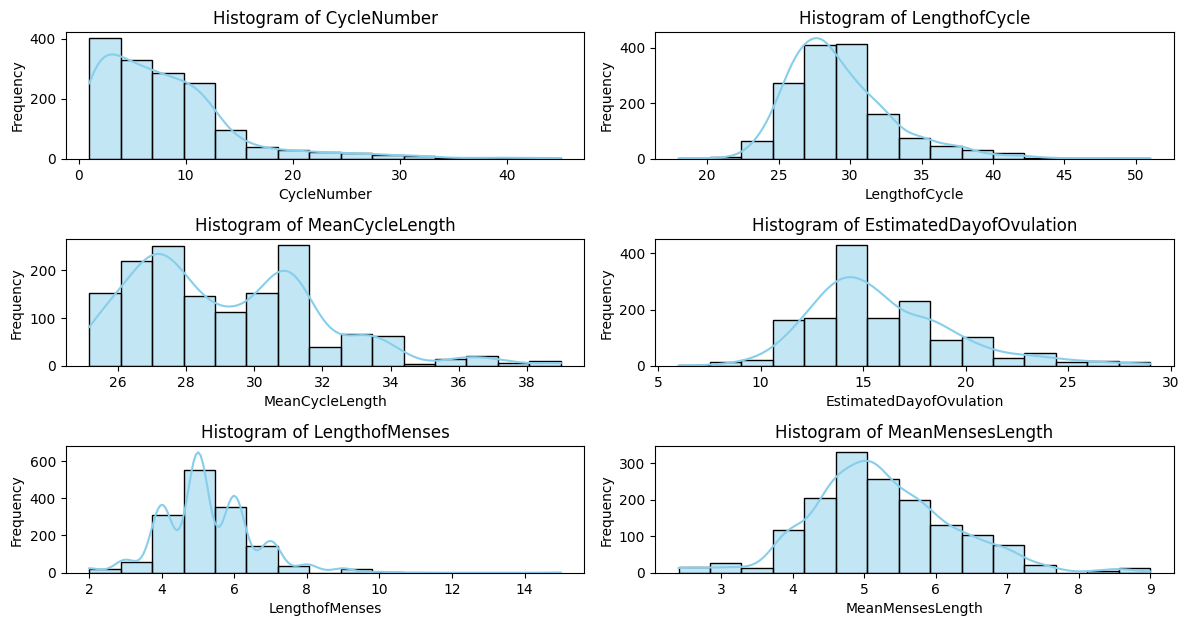

In [ ]:
# Plot histograms
columns_to_plot = ['CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofMenses',
       'MeanMensesLength']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

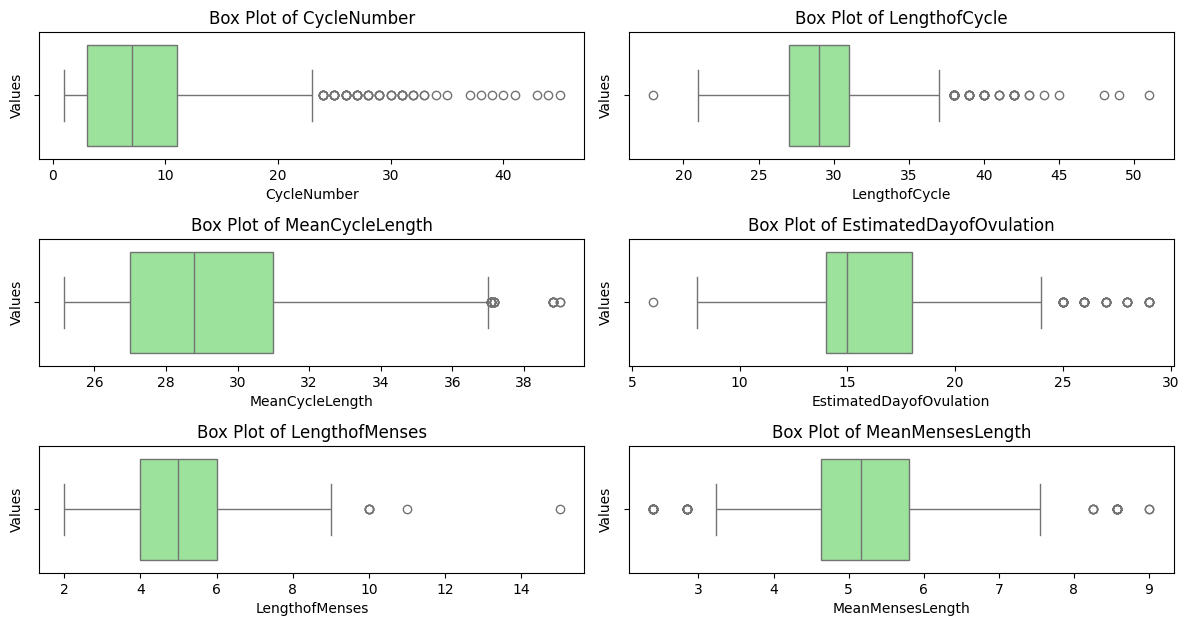

In [ ]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

In [ ]:
X = df.drop(columns=['EstimatedDayofOvulation'])  # All columns except 'y'
y = df['EstimatedDayofOvulation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Reshape the data to fit the RNN input shape (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])  # 1 timestep
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])  # 1 timestep

In [39]:
# Build the RNN model using LSTM
model = Sequential()

In [40]:
# Add LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Add Dropout to avoid overfitting
model.add(Dropout(0.2))

In [42]:
# Add Dense layer for output
model.add(Dense(units=1))

In [43]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [44]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 253.7476 - mae: 15.4863 - val_loss: 205.0335 - val_mae: 13.8864
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 197.8856 - mae: 13.5563 - val_loss: 129.3436 - val_mae: 10.8243
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114.6843 - mae: 10.0776 - val_loss: 77.6878 - val_mae: 8.1139
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.6573 - mae: 8.0303 - val_loss: 51.4890 - val_mae: 6.3126
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.5402 - mae: 6.0753 - val_loss: 32.4867 - val_mae: 4.6446
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.2555 - mae: 4.4305 - val_loss: 20.3935 - val_mae: 3.3751
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.7801 - mae: 3.3590 - val_loss: 15.0914 - val_mae: 2.8198
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6231 - mae: 2.9679 - val_loss: 12.6393 - val_mae: 2.6396
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [45]:
# Make predictions
y_pred = model.predict(X_test_reshaped)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [46]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.8155688302821975
Root Mean Squared Error: 2.610664442298588
R-squared: 0.43185616690122697
